In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from adapt.instance_based import TrAdaBoostR2
from lightgbm import LGBMRegressor as lgbm
from sklearn import metrics

In [2]:
data_s = pd.read_csv(f'data/data_s_S1FE.csv')
data_t = pd.read_csv(f'data/data_tFE.csv')
ys = pd.DataFrame(data_s['Yield'],columns=['Yield'])
Xs = data_s.drop(columns=['Name', 'ID', 'Yield'])
yt = pd.DataFrame(data_t['Yield'],columns=['Yield'])
Xt = data_t.drop(columns=['Name', 'ID', 'Yield'])

In [3]:
# train:test=6:4

r2_unlab = []
for i in range(100):
    Xt_lab, Xt_unlab, yt_lab, yt_unlab = train_test_split(Xt, yt, test_size=0.4, random_state=i)
    model = TrAdaBoostR2(lgbm(), n_estimators=6, Xt=Xt_lab, yt=yt_lab, random_state=0, verbose=0)
    model.fit(Xs, ys)
    y_pred2 = model.predict(Xt_unlab)
    r2_unlab.append(metrics.r2_score(yt_unlab, y_pred2))
    
print('Avg_R2_test:', np.mean(r2_unlab))
print('Max_R2_test:', np.max(r2_unlab))
print('Std_R2_test:', np.std(r2_unlab, ddof=0))

Avg_R2_test: 0.7583601823684987
Max_R2_test: 0.8899603063403743
Std_R2_test: 0.09125189847340184


In [4]:
# train:test=7:3

r2_unlab = []
for i in range(100):
    Xt_lab, Xt_unlab, yt_lab, yt_unlab = train_test_split(Xt, yt, test_size=0.3, random_state=i)
    model = TrAdaBoostR2(lgbm(), n_estimators=5, Xt=Xt_lab, yt=yt_lab, random_state=0, verbose=0)
    model.fit(Xs, ys)
    y_pred2 = model.predict(Xt_unlab)
    r2_unlab.append(metrics.r2_score(yt_unlab, y_pred2))
    
print('Avg_R2_test:', np.mean(r2_unlab))
print('Max_R2_test:', np.max(r2_unlab))
print('Std_R2_test:', np.std(r2_unlab, ddof=0))

Avg_R2_test: 0.7757221945362381
Max_R2_test: 0.9453728311115578
Std_R2_test: 0.09619642641351206


In [5]:
# train:test=8:2

r2_unlab = []
for i in range(100):
    Xt_lab, Xt_unlab, yt_lab, yt_unlab = train_test_split(Xt, yt, test_size=0.2, random_state=i)
    model = TrAdaBoostR2(lgbm(), n_estimators=5, Xt=Xt_lab, yt=yt_lab, random_state=0, verbose=0)
    model.fit(Xs, ys)
    y_pred2 = model.predict(Xt_unlab)
    r2_unlab.append(metrics.r2_score(yt_unlab, y_pred2))
    
print('Avg_R2_test:', np.mean(r2_unlab))
print('Max_R2_test:', np.max(r2_unlab))
print('Std_R2_test:', np.std(r2_unlab, ddof=0))

Avg_R2_test: 0.7794074169106665
Max_R2_test: 0.9485642109077589
Std_R2_test: 0.14202089777223978


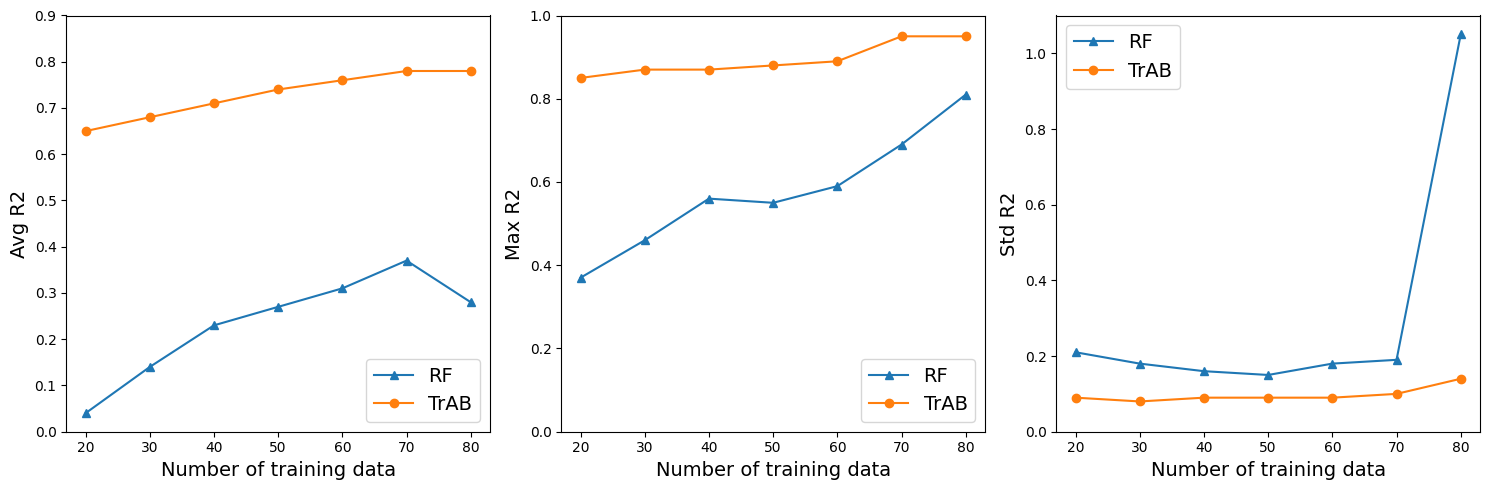

In [6]:
#Training data size=20-80
df = pd.read_csv('data/r2_test.csv')
df

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].plot(df['No_training'], df['Avg_RF'], label='RF', marker='^')
axes[0].plot(df['No_training'], df['Avg_TrAB'], label='TrAB', marker='o')
axes[0].set_xlabel('Number of training data', fontsize=14)
axes[0].set_ylabel('Avg R2', fontsize=14)
axes[0].set_ylim(0, 0.9)
axes[0].legend(loc='lower right', fontsize=14)

axes[1].plot(df['No_training'], df['Max_RF'], label='RF', marker='^')
axes[1].plot(df['No_training'], df['Max_TrAB'], label='TrAB', marker='o')
axes[1].set_xlabel('Number of training data', fontsize=14)
axes[1].set_ylabel('Max R2', fontsize=14)
axes[1].set_ylim(0, 1)
axes[1].legend(loc='lower right', fontsize=14)

axes[2].plot(df['No_training'], df['Std_RF'], label='RF', marker='^')
axes[2].plot(df['No_training'], df['Std_TrAB'], label='TrAB', marker='o')
axes[2].set_xlabel('Number of training data', fontsize=14)
axes[2].set_ylabel('Std R2', fontsize=14)
axes[2].set_ylim(0, 1.1)
axes[2].legend(loc='upper left', fontsize=14)

plt.tight_layout()
plt.show()

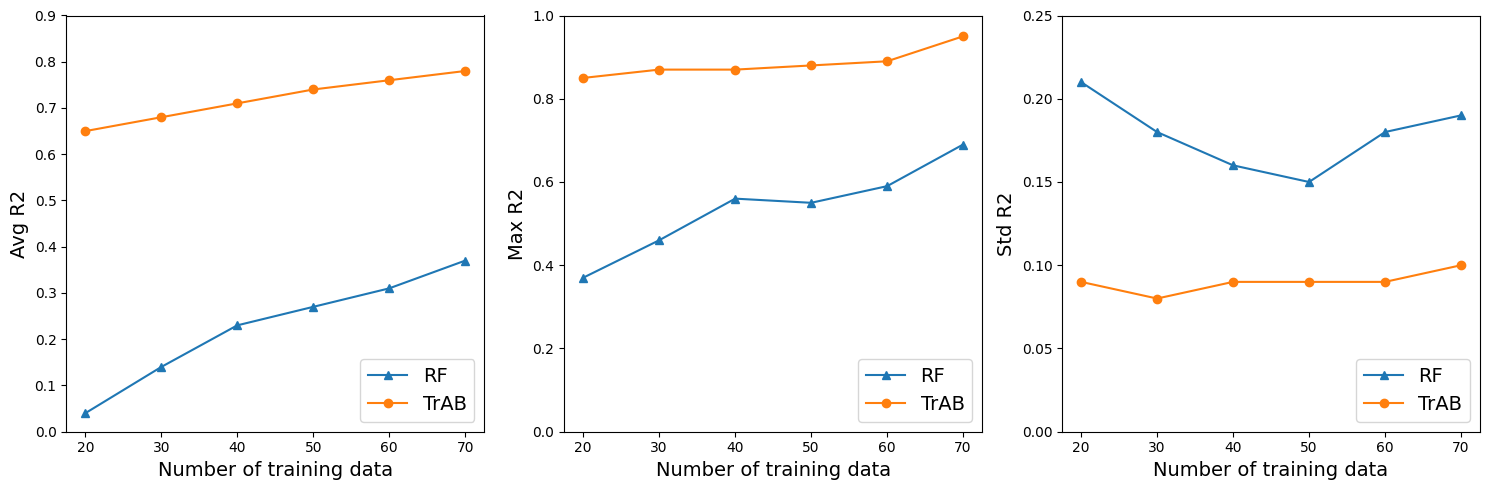

In [7]:
#Training data size=20-70
df = pd.read_csv('data/r2_test2.csv')
df

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].plot(df['No_training'], df['Avg_RF'], label='RF', marker='^')
axes[0].plot(df['No_training'], df['Avg_TrAB'], label='TrAB', marker='o')
axes[0].set_xlabel('Number of training data', fontsize=14)
axes[0].set_ylabel('Avg R2', fontsize=14)
axes[0].set_ylim(0, 0.9)
axes[0].legend(loc='lower right', fontsize=14)

axes[1].plot(df['No_training'], df['Max_RF'], label='RF', marker='^')
axes[1].plot(df['No_training'], df['Max_TrAB'], label='TrAB', marker='o')
axes[1].set_xlabel('Number of training data', fontsize=14)
axes[1].set_ylabel('Max R2', fontsize=14)
axes[1].set_ylim(0, 1)
axes[1].legend(loc='lower right', fontsize=14)

axes[2].plot(df['No_training'], df['Std_RF'], label='RF', marker='^')
axes[2].plot(df['No_training'], df['Std_TrAB'], label='TrAB', marker='o')
axes[2].set_xlabel('Number of training data', fontsize=14)
axes[2].set_ylabel('Std R2', fontsize=14)
axes[2].set_ylim(0, 0.25)
axes[2].legend(loc='lower right', fontsize=14)

plt.tight_layout()
plt.show()